In [1]:
import warnings
import math
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
import control.matlab as ml
import control
from math import pi
from scipy import signal
warnings.filterwarnings('ignore')

## Transferencia:


$$ H(s) = \dfrac{1, 356.10^7 . s^2}{s^4 + s^3 . 5207 + s^2 . 1,389 . 10^8 + s . 3,264 . 10^{11} + 3,928 . 10^{15}} $$

## Ejercicio 1 

#### Definir el tipo de filtro, calcular los polos y los ceros de la H(s), ωo y Q si corresponde

Para hallar el tipo de filtro veo los valores de H en o y en el infinito

$$ H(0) = 0 $$ 
$$ H(\infty) = 0 $$

Por lo que el filtro es uno de tipo **pasabanda**

In [2]:
num = [1.356 * 10**7, 0, 0]
den = [1, 5207, 1.389 * 10**8, 3.264 *10**11, 3.928*10**15]

H = ml.tf(num, den)
H

TransferFunction(array([13560000.,        0.,        0.]), array([1.000e+00, 5.207e+03, 1.389e+08, 3.264e+11, 3.928e+15]))

## Ceros y polos

In [3]:
print("Ceros:")
zeros = ml.zero(H)
for i,z in enumerate(zeros):
    print("z{}: {}".format(i + 1, z))

print("\nPolos:")
poles = ml.pole(H)
for i,p in enumerate(poles):
    print("p{}: {}".format(i + 1, p))

Ceros:
z1: 0.0
z2: 0.0

Polos:
p1: (-1514.9600990571644+9220.855933354847j)
p2: (-1514.9600990571644-9220.855933354847j)
p3: (-1088.5399009428356+6618.1126141820005j)
p4: (-1088.5399009428356-6618.1126141820005j)


## $\omega_0$ y $Q$

Para hallar $\omega_0$ y $Q$, factorizo el denominador de tal forma que me quede algo del siguiente estilo:

$$s^2 + \dfrac{\omega_0}{Q} + \omega_{0}^2$$

Al tener dos pares de raíces complejas conjugadas obtendré dos polinomios y asi obtendre los dos valores de Q y de $\omega_0$

In [4]:
p2 = np.poly1d([poles[0], poles[1]], r = True, variable = "s")
p1 = np.poly1d([poles[2], poles[3]], r = True, variable = "s")

print("Polinomio 1: \n", p1)
print("\nPolinomio 2: \n", p2)

Polinomio 1: 
    2
1 s + 2177 s + 4.498e+07

Polinomio 2: 
    2
1 s + 3030 s + 8.732e+07


In [5]:
w01 = round(np.sqrt(p1[0]), 4)
w02 = round(np.sqrt(p2[0]), 4)
Q1 = round(w01 / p1[1], 4)
Q2 = round(w02 / p2[1], 4)

### Parámetros

In [6]:
sigma1 = round(poles[0].real,4)
sigma2 = round(poles[2].real, 4)

tau1 = round(1 / abs(sigma1), 4)
tau2 = round(1 / abs(sigma2), 4)

tau = tau1 if tau1 > tau2 else tau2
f01 = round(w01 / (2 * np.pi), 4)
f02 = round(w02 / (2 * np.pi), 4)

print("w01 = ", w01)
print("w02 = ", w02)
print("f01 = ", f01)
print("f02 = ", f02)
print("Q1 = ", Q1)
print("Q2 = ", Q2)
print("sigma1 = ", sigma1)
print("tau1 = ", tau1)
print("sigma2 = ", sigma2)
print("tau2 = ", tau2)

w01 =  6707.0361
w02 =  9344.479
f01 =  1067.4579
f02 =  1487.22
Q1 =  3.0807
Q2 =  3.0841
sigma1 =  -1514.9601
tau1 =  0.0007
sigma2 =  -1088.5399
tau2 =  0.0009


## Ejercicio 2 

#### Realizar las siguientes simulaciones:
    a. Diagramas de Bode de modulo y fase.
    b. Respuesta al escalon.
    c. Respuesta al impulso.
    d. Respuesta a señal senoidal. Elegir 3 frecuencias que sean acordes a la caracteristica del filtro.
    e. Respuesta a señal cuadrada de estas frecuencias: fo/10, fo y 10 · fo .

### Diagramas de Bode

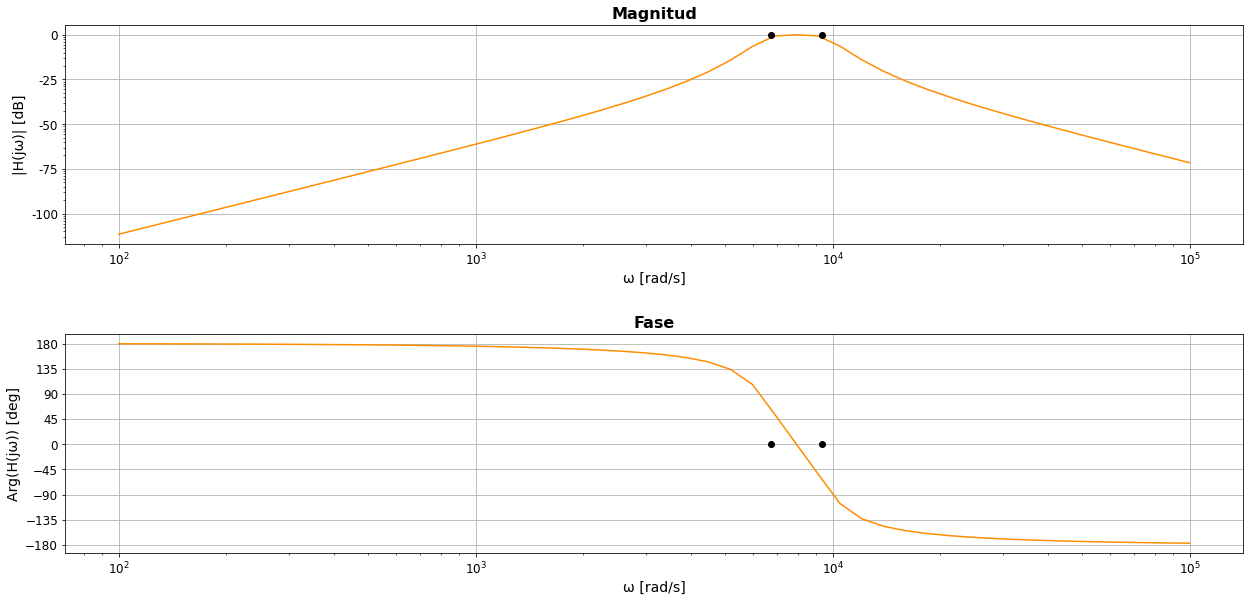

In [7]:
def bodePlots(H, w01 = None, w02 = None,lineColor = "darkorange"):
    mag, phase, omega = ml.bode(H, dB = True, deg = True, color = "darkorange", plot = False)
    phase = [ph * 180 / np.pi for ph in phase]  #Siempre te devuelve en radianes la funcion
    yTicksBodeMg = [str(i) for i in range(-150, 25, 25)]
    yTicksBodePh = [i for i in range(-225, 225, 45)]
    
    fig, axs = plt.subplots(2)
    #Bode Magnitude Plot
    axs[0].plot(omega, mag, color = lineColor)
    axs[0].set_xscale("log")
    axs[0].set_yscale("log")
    axs[0].set_yticklabels(yTicksBodeMg)
    axs[0].set_xlabel('ω [rad/s]', fontsize = 14)
    axs[0].set_ylabel('|H(jω)| [dB]', fontsize = 14)
    axs[0].set_title('Magnitud', fontsize = 16, fontweight = 'bold')
    if (w01 != None):
        axs[0].plot(w01, 1, marker = 'o',c = 'black')
    if (w02 != None):
        axs[0].plot(w02, 1, marker = 'o',c = 'black')
    
    axs[0].tick_params(axis='both', labelsize=12)
    axs[0].grid()
    
    #Bode Phase Plot
    axs[1].plot(omega, phase, color = lineColor)
    axs[1].set_xscale("log")
    axs[1].set_yticks(yTicksBodePh)
    axs[1].set_xlabel('ω [rad/s]', fontsize = 14)
    axs[1].set_ylabel('Arg(H(jω)) [deg]', fontsize = 14)
    axs[1].set_title('Fase', fontsize = 16, fontweight = 'bold')
    if (w01 != None):
        axs[1].plot(w01, 1, marker = 'o',c = 'black')
    if (w02 != None):
        axs[1].plot(w02, 1, marker = 'o',c = 'black')
        
    axs[1].tick_params(axis='both', labelsize=12)
    axs[1].grid()
    
    fig.set_size_inches(18, 9)
    fig.tight_layout(pad=3.0)
    plt.show();
    
bodePlots(H, w01, w02)

### Respuesta al escalón

<Figure size 1152x720 with 0 Axes>

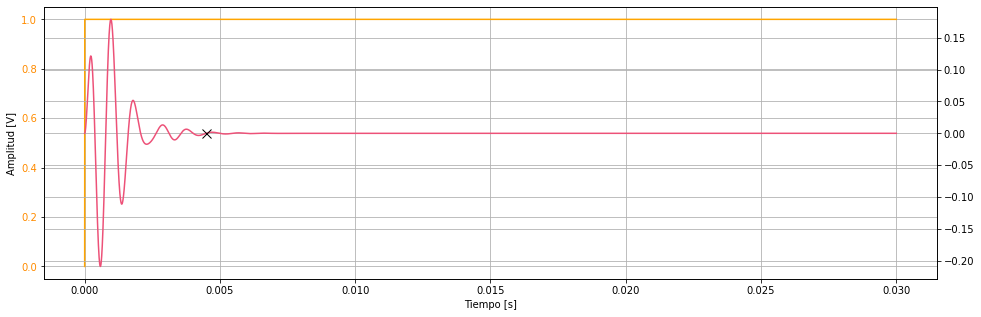

In [8]:
plt.figure(figsize=(16,10))
t = np.linspace(0, 0.03, 1000000, endpoint=False)
yout, T = ml.step(H, T=t)
#yrout, T = ml.step(Hr, T=t)
fig, ax1 = plt.subplots(figsize=(16,5))
ax1.set_ylabel('Amplitud [V]')
ax1.set_xlabel('Tiempo [s]')
ax1.plot(T, [0] + [1 for _ in range(len(T)-1)], color='orange')
ax1.set_ylabel('Amplitud [V]')
ax1.tick_params(axis='y', labelcolor='darkorange')
ax2 = ax1.twinx()
ax2.plot(T, yout, color='#ed5178')
#ax2.plot(T, yrout, color='#1655f5')
#ax2.plot(time, out, color='black')
ax2.tick_params(axis='y', labelcolor='black')
#ax2.legend(['H teórica', 'H real', 'H spice'])
ax1.grid(axis='both')
plt.plot(5 * tau, 0, color = 'black', marker = 'x', markersize = '9')
ax2.grid(axis='y')
plt.show();

### Respuesta al impulso unitario

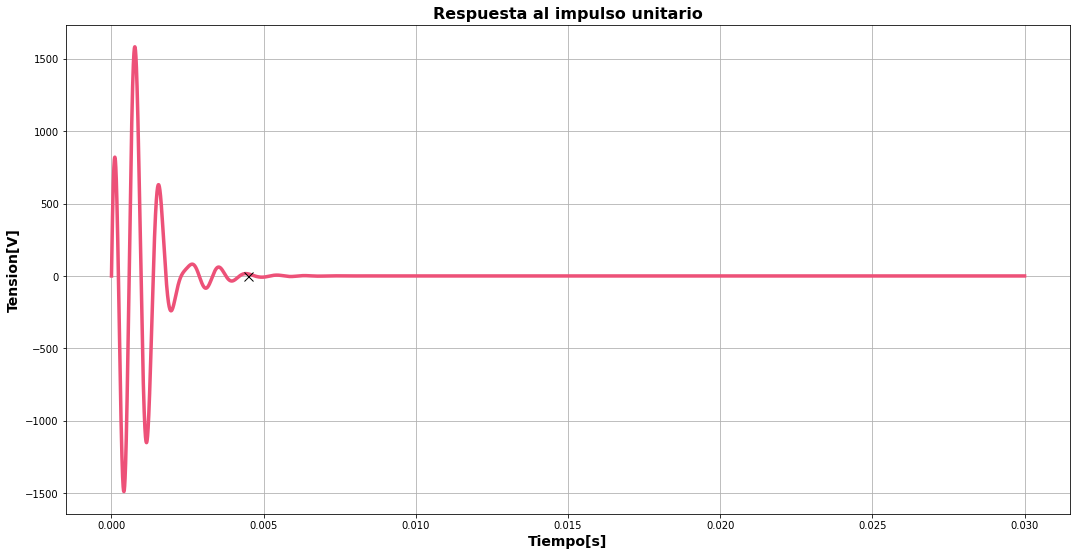

In [9]:
plt.figure(figsize=(18,9))
t = np.linspace(0, 0.03, 1000000, endpoint=False)
yout, T = ml.impulse(H, T=t)
plt.plot(T, yout, color = "#ed5178", linewidth = 3.5)
plt.title("Respuesta al impulso unitario", fontsize = 16, fontweight = "bold")
plt.xlabel("Tiempo[s]", fontsize = 14, fontweight = "bold")
plt.ylabel("Tension[V]", fontsize = 14, fontweight = "bold")
plt.plot(5 * tau, 0, color = 'black', marker = 'x', markersize = '9')
plt.grid()
plt.show();

t = np.linspace(0, 0.03, 1000000, endpoint=False)
yout, T = ml.step(H, T=t)

### Respuesta a la señal senoidal ideal

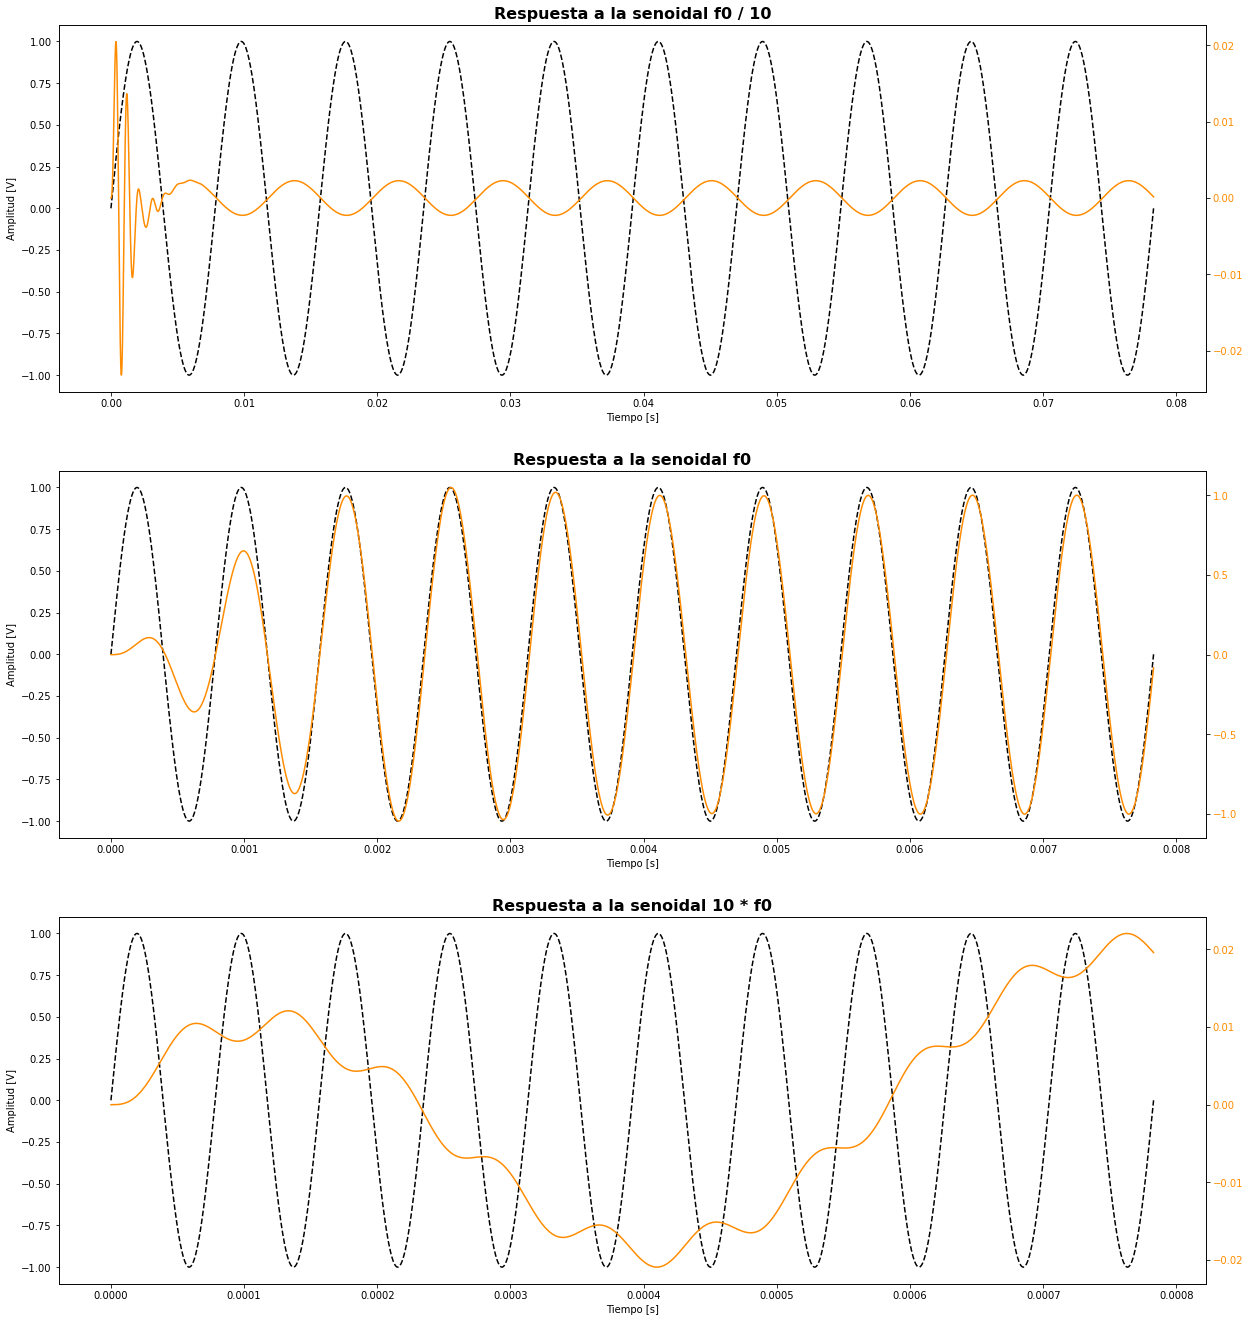

In [10]:
f0 = (f01 + f02)/2
dec = 10
freqs = [f0 / dec, f0, f0 * dec]

title = "Respuesta a la senoidal "
freqsText = ["f0 / 10", "f0", "10 * f0"]

fig, axs = plt.subplots(3)
for i, f in enumerate((f0/dec, f0, dec*f0)):
    periodo = 1/f
    t = np.linspace(0, 10*periodo, 1000000, endpoint=False)
    sig = np.sin(2 * np.pi * f * t)
    yout, T, xout = ml.lsim(H, U = sig, T = t)
    ax1 = plt.subplot(311 + i)
    ax1.plot(t, sig, color='black', label="Entrada", linestyle='--')
    ax1.set_ylabel('Amplitud [V]')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.set_title(title + freqsText[i], fontsize = 16, fontweight = 'bold')
    ax2 = ax1.twinx()
    ax2.plot(T, yout, color='darkorange')
    #ax2.plot(times[i], outs[i], color='black')
    ax2.tick_params(axis='y', labelcolor='darkorange')
    ax1.set_xlabel('Tiempo [s]')
fig.set_size_inches(18, 19)
fig.tight_layout(pad=3.0)
plt.show();

### Respuesta a la cuadrada

In [11]:
def plotSignalResponse(f0, Hs, data = None, sigSquare = True, freqsText = ["f0 / 10", "f0", "10 * f0"]):
    #Hs = [H, Hcalc]
    freqs = [f0 / 10, f0, f0 * 10]
    legends = ["Ideal", "Normalizada", "Simulada"]
    colors = ["darkorange", "blue", "lightgreen"]
    title = "Respuesta a la " + ("cuadrada " if sigSquare else "senoidal ")
    
    fig, axs = plt.subplots(3)
    for i,f in enumerate(freqs):
        axs[i].set_title(title + freqsText[i], fontsize = 16, fontweight = 'bold')
        t = np.linspace(0, 10 / f, 1000000, endpoint=False) if sigSquare else np.linspace(0, 0.03, 1000000, endpoint=False)
        sig = signal.square(2 * np.pi * f * t) if sigSquare else np.sin(2 * np.pi * f * t)
        axs[i].plot(t, sig, color='black', label = 'Entrada', linestyle='--')
        axs[i].set_ylabel('Tension [V]', fontsize = 14)
        axs[i].set_xlabel('Tiempo [s]', fontsize = 14) 
        axs[i].tick_params(axis='both', labelsize=12)
        axs[i].grid()
        for j,H in enumerate(Hs):
            yout, T, xout = ml.lsim(H, sig, t)
            axs[i].plot(T, yout, color=colors[j], label=legends[j])
        
        if (data):
            print("")
        
        axs[i].legend(loc='upper right', fontsize = 'x-large')
        
              
    fig.set_size_inches(18, 19)
    fig.tight_layout(pad=3.0)
    plt.show();

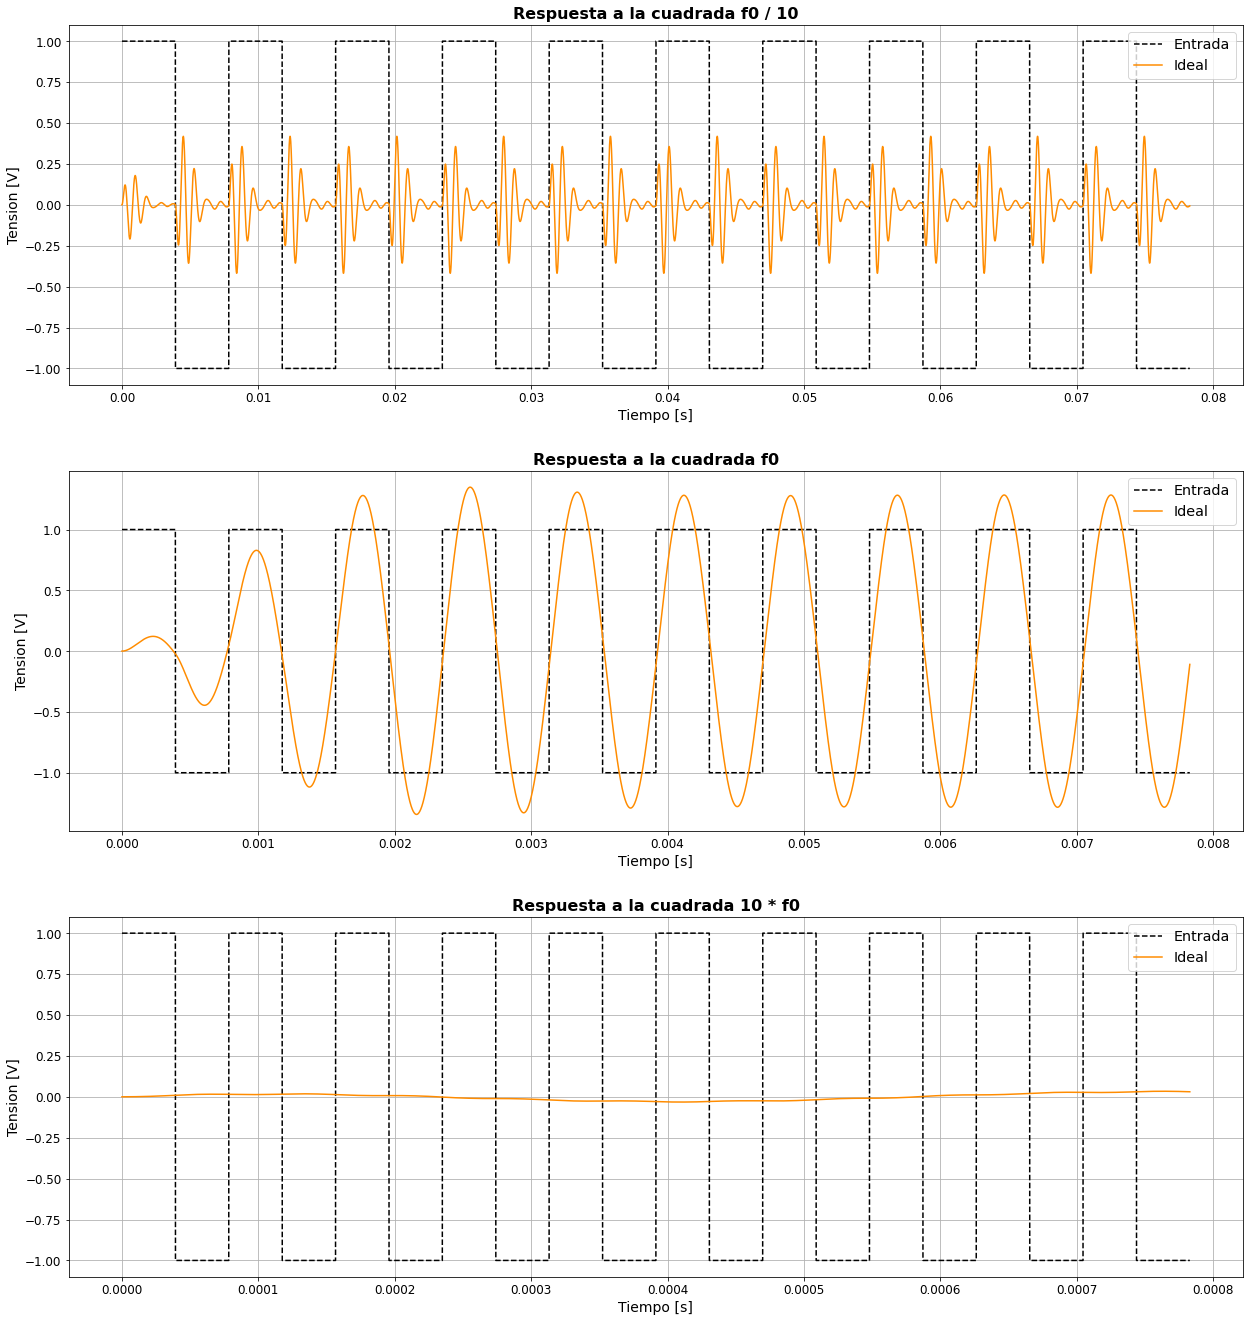

In [12]:
plotSignalResponse(f0, [H])

## Ejercicio 3

Elegir un circuito con amplificadores operacionales que cumpla con la transferencia propuesta.  
Justificar la eleccion del mismo

## Ejercicio 4

Definir los valores de los componentes y recalcular la transferencia con los
valores normalizados de los componentes elegidos.

### Primer circuito

In [13]:
b0_c1 = np.sqrt(num[0])
a2_c1 = 1
a1_c1 = p1[1]
a0_c1 = p1[0]

w0_c1 = np.sqrt(a0_c1)
alpha_c1 = a1_c1/w0_c1
Q_c1 = 1/alpha_c1
H_c1 = b0_c1/w0_c1

print(f'''
    w0: {w0_c1:.2f}
    alpha: {alpha_c1:.2f}
    Q: {Q_c1:.2f}
    H: {H_c1:.2f}
''')


    w0: 6707.04
    alpha: 0.32
    Q: 3.08
    H: 0.55



In [14]:
#CON C DE 100 nano
C1 = 100e-9
k_c1 = w0_c1*C1
C2 = C1
R1 = 1/(H_c1*k_c1)
R2 = 1/((2*Q_c1-H_c1)*k_c1)
R5 = 2*Q_c1/k_c1

print(f'''
    C1: {C1}
    k: {k_c1}
    C2: {C2}
    R1: {R1}
    R2: {R2}
    R5: {R5}
''')


    C1: 1e-07
    k: 0.0006707036133042639
    C2: 1e-07
    R1: 2715.6272329678422
    R2: 265.653659076891
    R5: 9186.617772429407



In [15]:
num_1 = [1/(R1*C1), 0]
den_1 = [1, (C1+C2)/(C1*C2*R5), (1/R1+1/R2)/(R5*C1*C2)]

H1 = ml.tf(num_1, den_1)
H1

TransferFunction(array([3682.3905279,    0.       ]), array([1.00000000e+00, 2.17707980e+03, 4.49843337e+07]))

In [16]:
h1 = signal.TransferFunction(num_1, den_1)
h1

TransferFunctionContinuous(
array([3682.3905279,    0.       ]),
array([1.00000000e+00, 2.17707980e+03, 4.49843337e+07]),
dt: None
)

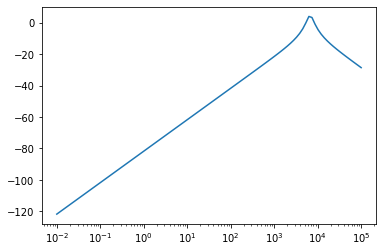

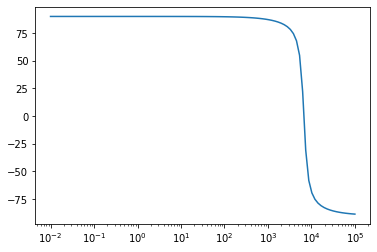

In [17]:
w, mag, phase = signal.bode(h1)
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.show()

### Segundo circuito

In [18]:
b0_c2 = np.sqrt(num[0])
a2_c2 = 1
a1_c2 = p2[1]
a0_c2 = p2[0]

w0_c2 = np.sqrt(a0_c2)
alpha_c2 = a1_c2/w0_c2
Q_c2 = 1/alpha_c2
H_c2 = b0_c2/w0_c2

print(f'''
    w0: {w0_c2:.2f}
    alpha: {alpha_c2:.2f}
    Q: {Q_c2:.2f}
    H: {H_c2:.2f}
''')


    w0: 9344.48
    alpha: 0.32
    Q: 3.08
    H: 0.39



In [19]:
#CON C DE 100 nano
C3 = 100e-9
k_c2 = w0_c2*C3
C4 = C3
R3 = 1/(H_c2*k_c2)
R4 = 1/((2*Q_c2-H_c2)*k_c2)
R6 = 2*Q_c2/k_c2

print(f'''
    C3: {C3}
    k: {k_c2}
    C4: {C4}
    R3: {R3}
    R4: {R4}
    R6: {R6}
''')


    C3: 1e-07
    k: 0.0009344479024826401
    C4: 1e-07
    R3: 2715.6272329678422
    R4: 185.3375003805216
    R6: 6600.833913859185



In [20]:
num_2 = [1/(R3*C4), 0]
den_2 = [1, (C3+C4)/(C3*C4*R6), (1/R3+1/R4)/(R6*C3*C4)]

H2 = ml.tf(num_2, den_2)
H2

TransferFunction(array([3682.3905279,    0.       ]), array([1.00000000e+00, 3.02992020e+03, 8.73192882e+07]))

In [21]:
h2 = signal.TransferFunction(num_2, den_2)
h2

TransferFunctionContinuous(
array([3682.3905279,    0.       ]),
array([1.00000000e+00, 3.02992020e+03, 8.73192882e+07]),
dt: None
)

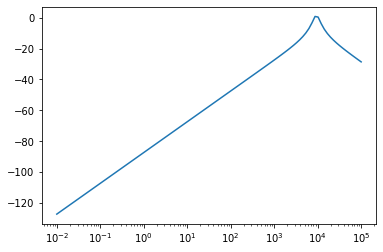

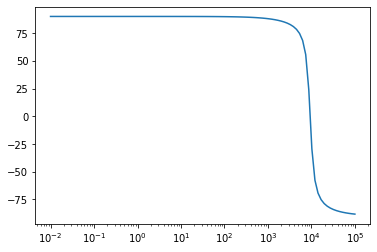

In [22]:
w, mag, phase = signal.bode(h2)
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.show()

In [23]:
#Poniendo los dos circuitos en cascada
poles = np.concatenate((h1.to_zpk().poles, h2.to_zpk().poles))
zeros = np.concatenate((h1.to_zpk().zeros, h2.to_zpk().zeros))
gain = h1.to_zpk().gain*h2.to_zpk().gain

htot = signal.ZerosPolesGain(zeros, poles, gain)
htot.to_tf()

TransferFunctionContinuous(
array([13560000.,        0.,        0.]),
array([1.000e+00, 5.207e+03, 1.389e+08, 3.264e+11, 3.928e+15]),
dt: None
)

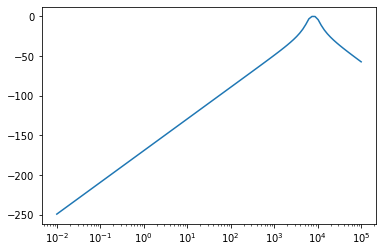

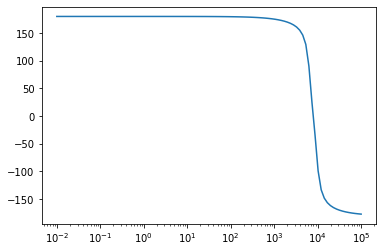

In [24]:
w, mag, phase = signal.bode(htot)
plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.show()

In [25]:
def errorPercentage(trueValue, value):
    return abs(trueValue - value) * 100 / trueValue

### Calculo del error con los componentes normalizados

### Primer circuito

In [26]:
print(f'''
    R1: {R1}
    R2: {R2}
    R5: {R5}
''')


    R1: 2715.6272329678422
    R2: 265.653659076891
    R5: 9186.617772429407



In [27]:
R1 = 2700
R2 = 270
R5 = 9100

In [28]:
w0_c1 = np.sqrt((1/R1+1/R2)/(R5*C1*C2))
Q_c1 = w0_c1 / ((C1+C2)/(C1*C2*R5))

error_w0_1 = errorPercentage(w01, w0_c1)
error_Q_1 = errorPercentage(Q1, Q_c1)

print(f'''
    Error w0: {error_w0_1}
    Error Q: {error_Q_1 }
''')


    Error w0: 0.2384655593259354
    Error Q: 1.1775191149179172



In [29]:
print(f'''
    w0_c1: {w0_c1}
    Q_c1: {Q_c1}
''')


    w0_c1: 6691.042128849943
    Q_c1: 3.044424168626724



### Segundo circuito

In [30]:
print(f'''
    R3: {R3}
    R4: {R4}
    R6: {R6}
''')


    R3: 2715.6272329678422
    R4: 185.3375003805216
    R6: 6600.833913859185



In [31]:
R3 = 2700
R4 = 180
R6 = 6800

In [32]:
w0_c2 = np.sqrt((1/R3+1/R4)/(R6*C3*C4))
Q_c2 = w0_c2 / ((C3+C4)/(C3*C4*R6))

error_w0_2 = errorPercentage(w02, w0_c2)
error_Q_2 = errorPercentage(Q2, Q_c2)

print(f'''
    Error w0: {error_w0_2}
    Error Q: {error_Q_2 }
''')


    Error w0: 0.09929328123340245
    Error Q: 2.9139194728928715



In [33]:
w0_c2/(2*np.pi)

1485.743313907949

### Circuito total 

In [34]:
num_1 = [1/(R1*C1), 0]
den_1 = [1, (C1+C2)/(C1*C2*R5), (1/R1+1/R2)/(R5*C1*C2)]

H1 = ml.tf(num_1, den_1)

num_2 = [1/(R3*C4), 0]
den_2 = [1, (C3+C4)/(C3*C4*R6), (1/R3+1/R4)/(R6*C3*C4)]

H2 = ml.tf(num_2, den_2)

Htot = H1 * H2
Htot

TransferFunction(array([13717421.12482853,        0.        ,        0.        ]), array([1.00000000e+00, 5.13897867e+03, 1.38380138e+08, 3.23206206e+11,
       3.90152896e+15]))

In [35]:
error_H = errorPercentage(num[0], num_2[0]*num_1[0])

print(f'''
    Error H: {error_H}
''')


    Error H: 1.1609227494729246



## Simulaciones sobre el circuito real 

In [36]:
# fig = plt.figure(figsize=(16,10))
# ax = fig.add_subplot()
# mod, fase, w = ml.bode(H);
# modc, fasec, wc = ml.bode(Htot);
# labels = ["H téorico", "H real"]
# ax.legend(loc='upper right', fontsize = 'x-large')
# plt.show();

In [37]:
def drawResponse(transferFunctions, ltspiceData = None, tau = None, step = True):
    colors = ["magenta", "darkorange", "darkgreen"]
    labels = ["Real", "Teórica", "Spice"]
    lineWidths = [1.8, 1.5]
    plt.figure(figsize=(18,9))
    t = np.linspace(0, 0.01, 1000000, endpoint=False)
    for i,H in enumerate(transferFunctions):
        yout, T = ml.step(H, t) if step else ml.impulse(H, t)
        plt.plot(T, yout, color = colors[i], linewidth=lineWidths[i], label=labels[i])
    
    if ltspiceData:
        timeSpice = ltspiceData[0]
        vSpice = ltspiceData[1]
        plt.plot(timeSpice, vSpice, color = colors[2], linewidth=lineWidths[2], label=labels[2])
    
    title = "Respuesta al " + ("escalon" if step else "impulso") + "\n"
    
    plt.title(title, fontsize = 16, fontweight = "bold")
    plt.xlabel("Tiempo[s]", fontsize = 14, fontweight = "bold")
    plt.ylabel("Tension[V]", fontsize = 14, fontweight = "bold")
    if tau:
        plt.plot(5 * tau, 0, color = 'black', marker = 'x', markersize = '9')
    plt.legend(loc='upper right', fontsize = 'x-large')
    plt.grid()
    plt.show();

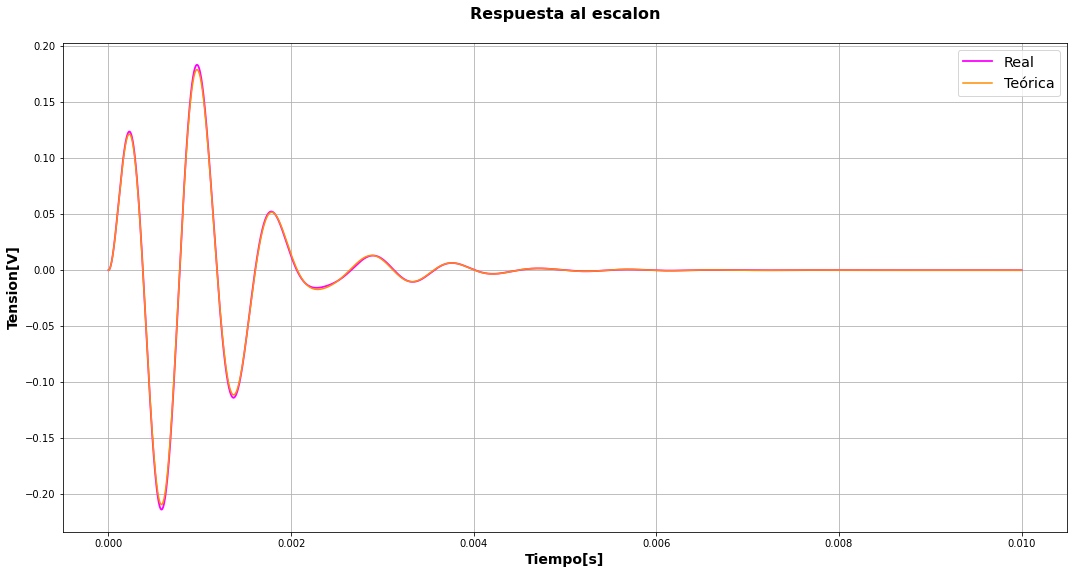

In [38]:
drawResponse([Htot, H])

## Simulaciones LTSPice

In [39]:
def bodePlots2(transferFunctions, ltspiceData = None):
    yTicksBodeMg = [str(i) for i in range(-125, 50, 25)]
    yTicksBodePh = [i for i in range(-225, 225, 45)]
    
    #To distinguish each line
    colors = ["darkorange", "magenta", "darkgreen"]
    labels = ["Ideal", "Normalizada", "Spice"]
    lineWidths = [3.5, 2.5, 1.5]
    
    fig, axs = plt.subplots(2)
    
    for i,H in enumerate(transferFunctions):
        mag, phase, omega = ml.bode(H, plot = False)
        #db = True doesnt return the result in dB, the same for deg = True, the conditions are for the plot
        phase = [ph * 180 / np.pi for ph in phase]  #ALWAYS RETURN IN RADIANS ML.BODE()
        mag = [20 * np.log10(m) for m in mag]
        
        #Bode Magnitude Plot
        axs[0].plot(omega, mag, color = colors[i], label=labels[i], lw=lineWidths[i])
        #Bode Phase Plot
        axs[1].plot(omega, phase, color = colors[i], label=labels[i], lw=lineWidths[i])
    
    if ltspiceData:
        magSpice, phaseSpice, omegaSpice = ltspiceData
        axs[0].plot(omegaSpice, magSpice, color = colors[2], label=labels[2], lw=lineWidths[2])
        axs[1].plot(omegaSpice, phaseSpice, color = colors[2], label=labels[2], lw=lineWidths[2])
        
    #Settings for the Magnitude Plot
    axs[0].set_xscale("log")
    axs[0].set_yticklabels(yTicksBodeMg)
    axs[0].set_xlabel('w[rad/s]', fontsize = 14)
    axs[0].set_ylabel('|H(jw)|[dB]', fontsize = 14)
    axs[0].set_title('Magnitud', fontsize = 16, fontweight = 'bold')

    axs[0].tick_params(axis='both', labelsize=12)
    axs[0].legend(loc='upper right', fontsize = 'x-large')
    axs[0].grid()
    
    #Settings for Phase Plot
    axs[1].set_xscale("log")
    axs[1].set_yticks(yTicksBodePh)
    axs[1].set_xlabel('w[rad/s]', fontsize = 14)
    axs[1].set_ylabel('Arg(H(jw))[deg]', fontsize = 14)
    axs[1].set_title('Fase', fontsize = 16, fontweight = 'bold')

    axs[1].tick_params(axis='both', labelsize=12)
    axs[1].legend(loc='upper right', fontsize = 'x-large')
    axs[1].grid()
    
    fig.set_size_inches(18, 9)
    fig.tight_layout(pad=3.0)
    plt.show();

In [40]:
freqs = [f0 / 10, f0, f0 * 10]
for f in freqs:
    T = 1 / f
    print("T = {}   T/2 = {}   5T = {}".format(T, T / 2, 5 * T))

T = 0.0078287755963286   T/2 = 0.0039143877981643   5T = 0.039143877981643004
T = 0.0007828775596328601   T/2 = 0.00039143877981643005   5T = 0.0039143877981643
T = 7.8287755963286e-05   T/2 = 3.9143877981643e-05   5T = 0.00039143877981643005


## Diagrama de Bode

In [41]:
# #Data Spice
# PATH = 'ltspicedata/'
# bodeSpiceDF = pd.read_csv(PATH + 'Bode3.txt')

In [42]:
# bodeSpiceDF['Freq'] *= (2 * np.pi)

# magSpice = bodeSpiceDF['Mag'].to_numpy() 
# phaseSpice = np.unwrap(bodeSpiceDF['Phase'].to_numpy())
# omegaSpice = bodeSpiceDF['Freq'].to_numpy()
# dataSpiceBode = [magSpice, phaseSpice, omegaSpice]

In [43]:
# #Square signals
# squareF0Over10 = pd.read_csv(PATH + 'squareOver10.txt')
# squareF0 = pd.read_csv(PATH + 'square.txt')
# squareF0By10 = pd.read_csv(PATH + 'squareBy10.txt')
# #Sin signals
# sinF0 = pd.read_csv(PATH + 'sine_f0.txt')
# sinF0Over10 = pd.read_csv(PATH + 'sine_f0_over_10.txt')
# sinF0By10 = pd.read_csv(PATH + 'sine_f0_times_10.txt')

In [44]:
# dataFramesSin = [sinF0Over10, sinF0, sinF0By10]
# dataSpiceSin = []
# for dfSin in zip(dataFramesSin):
#     dataSpiceSin.append([dfSin['Time'].to_numpy(), dfSin['V'].to_numpy()])

## Calculos analíticos

### Respuesta al escalon

In [45]:
sp.init_printing()

def compilar(ilt):
    '''
    Compila una expresión de Sympy a una función de Python.
    ilt: Transformada inversa de Laplace en función de t (símbolo de Sympy).
    
    Devuelve una función que recibe un parámetro de tipo float (el punto en
    el cual se especializará la expresión).
    '''
    I = 1j
    exp = lambda x: math.e ** x
    return lambda t: eval(f"lambda I, exp, t: {str(ilt)}")(I, exp, t).real

s = sp.Symbol('s')
t = sp.Symbol('t', real=True)

In [46]:
residuos = []
polos = list(control.matlab.pole(Htot))

for i, polo in enumerate(polos):
    denominador = 1
    for j, otro_polo in enumerate(polos):
        if i == j: continue
        denominador *= (s-otro_polo)
    # La respuesta al escalón elimina una s del numerador.
    H = ((1.372 * 10**7) * s * sp.exp(s*t))/denominador
    residuos.append(H.subs(s, polo))

esc_ilt = sum(residuos)

rta_escalon = compilar(esc_ilt)

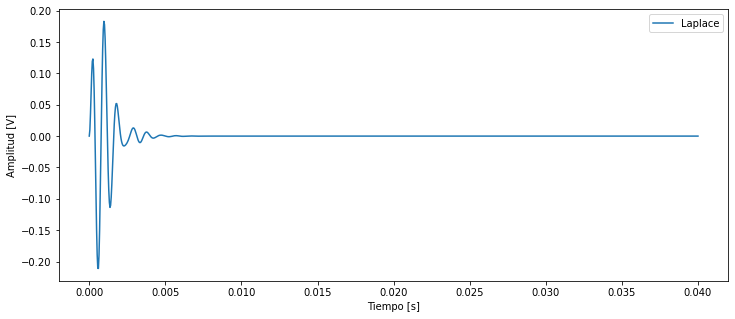

In [47]:
plt.figure(figsize=(12,5))
tt = np.linspace(0, 0.04, 1000)
yy = rta_escalon(tt)
plt.ylabel("Amplitud [V]")
plt.xlabel("Tiempo [s]")
plt.plot(tt, yy);
#plt.plot(time, out)
plt.legend(['Laplace', 'Spice'])

In [48]:
print(*tuple(r.simplify() for r in residuos),sep='\n')

(-0.165997349436629 + 0.00104724939292145*I)*exp(t*(-1470.58823529412 + 9218.64088361866*I))
-(0.165997349436629 + 0.00104724939292145*I)*exp(-t*(1470.58823529412 + 9218.64088361866*I))
(0.165997349436629 + 0.00788536260363583*I)*exp(t*(-1098.9010989011 + 6600.18644773605*I))
(0.165997349436629 - 0.00788536260363583*I)*exp(-t*(1098.9010989011 + 6600.18644773605*I))


### Respuesta al impulso unitario

In [49]:
residuos = []

for i, polo in enumerate(polos):
    denominador = 1
    for j, otro_polo in enumerate(polos):
        if i == j: continue
        denominador *= (s-otro_polo)
    
    H = (1.372e7 * s*s * sp.exp(s*t))/denominador
    residuos.append(H.subs(s, polo))

imp_ilt = sum(residuos)

rta_impulso = compilar(imp_ilt)

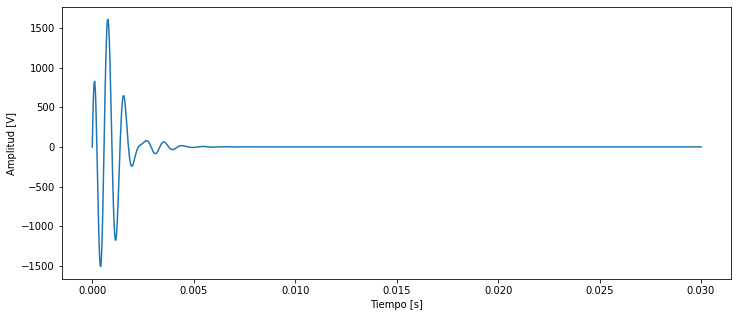

In [50]:
plt.figure(figsize=(12,5))
tt = np.linspace(0, 0.03, 1000)
yy = rta_impulso(tt)
plt.ylabel("Amplitud [V]")
plt.xlabel("Tiempo [s]")
plt.plot(tt, yy);

In [51]:
print(*tuple(r.simplify() for r in residuos),sep='\n')

(234.459533102583 - 1531.81002472549*I)*exp(t*(-1470.58823529412 + 9218.64088361866*I))
(234.459533102583 + 1531.81002472549*I)*exp(-t*(1470.58823529412 + 9218.64088361866*I))
(-234.459533102583 + 1086.94822248138*I)*exp(t*(-1098.9010989011 + 6600.18644773605*I))
-(234.459533102583 + 1086.94822248138*I)*exp(-t*(1098.9010989011 + 6600.18644773605*I))


### Respuesta a la señal senoidal

In [52]:
# Frecuencia de la señal senoidal a evaluar
w = 2*math.pi*f0

# La señal senoidal agrega dos polos complejos conjugados en -jw y +jw.

polos_totales = polos + [-w*1j, w*1j]

residuos = []

for i, polo in enumerate(polos_totales):
    denominador = 1
    for j, otro_polo in enumerate(polos_totales):
        if i == j: continue
        denominador *= (s-otro_polo)

    # La señal senoidal agrega un w al numerador
    H = (w * 1.372e7 * s * s * sp.exp(s*t))/denominador
    residuos.append(H.subs(s, polo))

sen_ilt = sum(residuos)

rta_senoidal = compilar(sen_ilt)

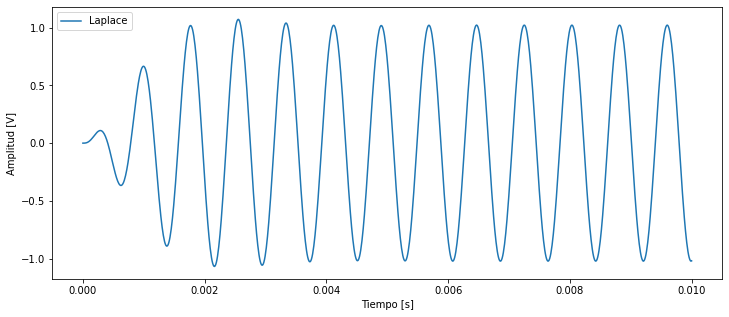

In [53]:
plt.figure(figsize=(12,5))
tt = np.linspace(0, 0.01, 1000)
yy = rta_senoidal(tt)
plt.ylabel("Amplitud [V]")
plt.xlabel("Tiempo [s]")
plt.plot(tt, yy);
#plt.plot(time, out);
plt.legend(['Laplace', 'Spice']);

In [54]:
print(*tuple(r.simplify() for r in residuos),sep='\n')

(0.278114022631527 + 0.258217491574016*I)*exp(t*(-1470.58823529412 + 9218.64088361866*I))
(0.278114022631527 - 0.258217491574016*I)*exp(-t*(1470.58823529412 + 9218.64088361866*I))
(-0.241114514265505 + 0.236921822125215*I)*exp(t*(-1098.9010989011 + 6600.18644773605*I))
-(0.241114514265505 + 0.236921822125215*I)*exp(-t*(1098.9010989011 + 6600.18644773605*I))
(-0.0369995083660218 + 0.50938155302044*I)*exp(-8025.7573229282*I*t)
-(0.0369995083660218 + 0.50938155302044*I)*exp(8025.7573229282*I*t)
